In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datatemp=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")
np.array(datatemp)
data=pd.DataFrame(datatemp)

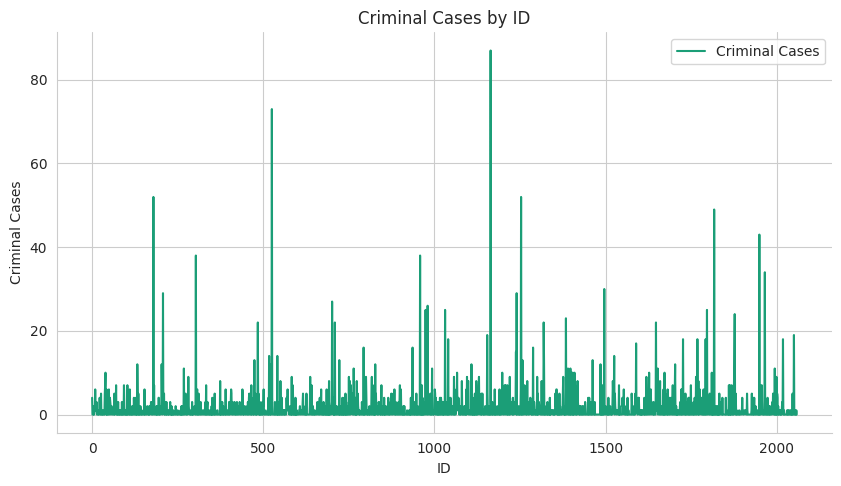

In [ ]:
# 1. IDs vs criminal cases

from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name):

    xs = series['ID']
    ys = series['Criminal Case']

    palette = sns.color_palette('Dark2')

    plt.plot(xs, ys, label=series_name, color=palette[len(plt.gca().lines) % len(palette)])

df_sorted = data.sort_values('ID', ascending=True)

fig, ax = plt.subplots(figsize=(10, 5.2))

_plot_series(df_sorted, 'Criminal Cases')

sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
plt.ylabel('Criminal Cases')
plt.title('Criminal Cases by ID')

plt.legend()
plt.grid(True)

plt.show()




<ipython-input-204-50b4df008f54>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Party', y='percentage_assets', data=grouped1_data,palette='viridis')


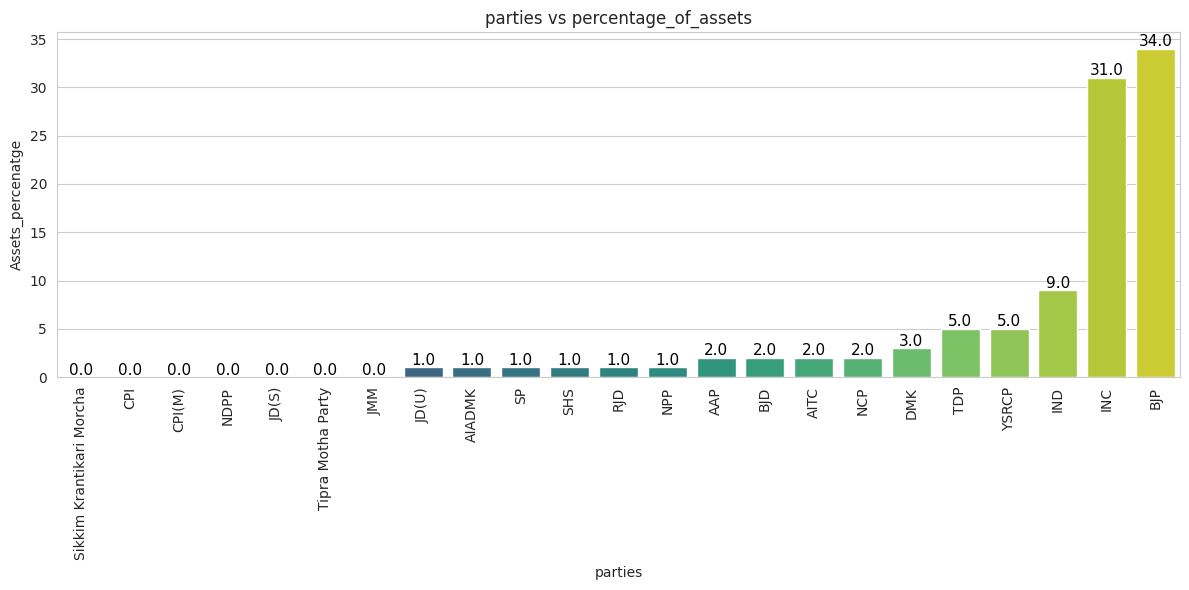

In [ ]:
# 2. Parties vs percentage of total assets their candidates hold


def convert_to_integer(amount):
    if 'Crore+' in amount:
        numeric_part = float(amount.split(' ')[0])
        return int(numeric_part * 10000000)
    elif 'Lac+' in amount:
        numeric_part = float(amount.split(' ')[0])
        return int(numeric_part * 100000)
    elif 'Thou+' in amount:
        numeric_part = float(amount.split(' ')[0])
        return int(numeric_part * 1000)
    elif 'Hund+' in amount:
        numeric_part = float(amount.split(' ')[0])
        return int(numeric_part * 100)
    else:
      return int(amount)

data['Assets']=data['Total Assets'].apply(convert_to_integer)
test_data['Assets']=test_data['Total Assets'].apply(convert_to_integer)

data['liabilities']=data['Liabilities'].apply(convert_to_integer)
test_data['liabilities']=test_data['Liabilities'].apply(convert_to_integer)

grouped1_data = data.groupby('Party')['Assets'].sum().reset_index()

total_assets = grouped1_data['Assets'].sum()

grouped1_data['percentage_assets'] = ((grouped1_data['Assets'] / total_assets) * 100).round(0)
grouped1_data.sort_values('percentage_assets',inplace=True)




plt.figure(figsize=(12, 6))

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')


ax = sns.barplot(x='Party', y='percentage_assets', data=grouped1_data,palette='viridis')

plt.xlabel('parties')  # Label for x-axis
plt.ylabel('Assets_percenatge')  # Label for y-axis
plt.title('parties vs percentage_of_assets')  # Title of the plot

plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()











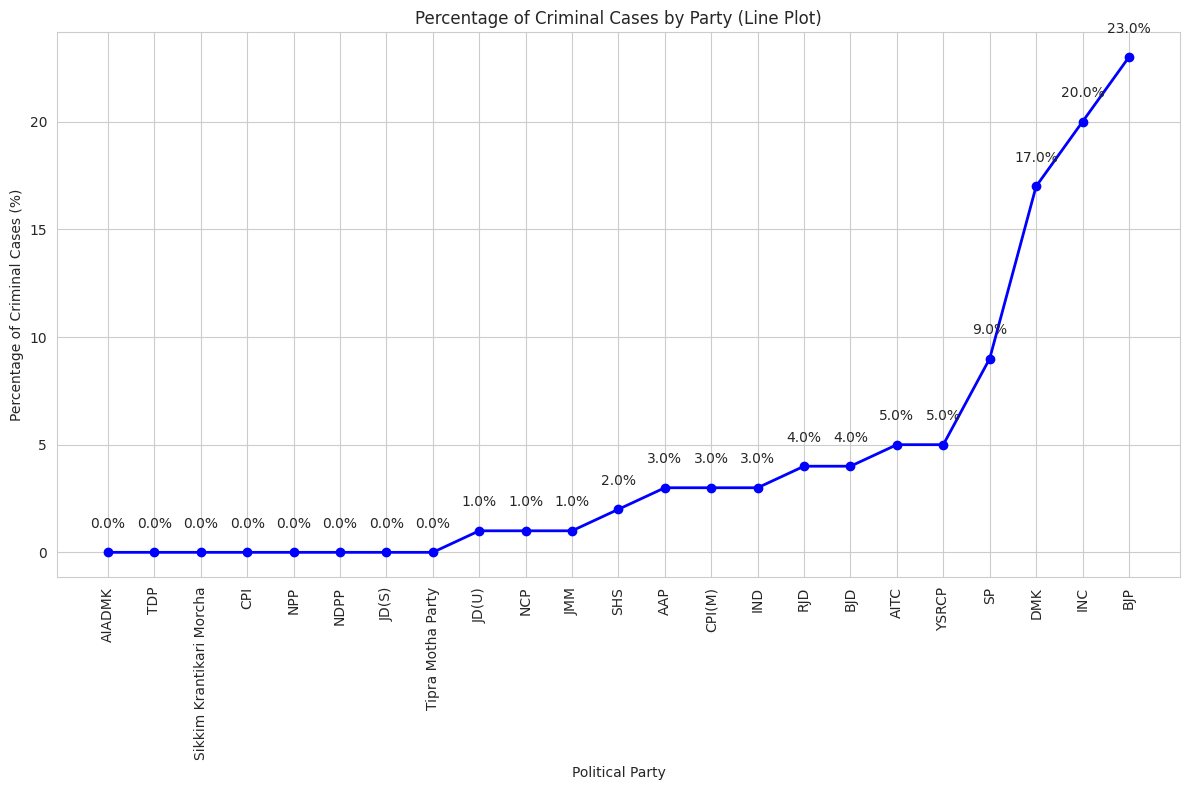

In [ ]:
#  3. percentage of Criminal Cases Party wise(percentages approximate to nearest integers)




import matplotlib.pyplot as plt
import seaborn as sns



sns.set_style('whitegrid')


grouped_data = data.groupby('Party')['Criminal Case'].sum().reset_index()

# Calculating the total sum across all states to compute percentages
total_sum = grouped_data['Criminal Case'].sum()
grouped_data['percentage'] = ((grouped_data['Criminal Case'] / total_sum) * 100).round(0)
grouped_data.sort_values('percentage',inplace=True)




#  a line plot
plt.figure(figsize=(12, 8))
plt.plot(grouped_data['Party'], grouped_data['percentage'], marker='o', color='blue', linestyle='-', linewidth=2)

# Annotating each data point with the exact percentage value
for i, percentage in enumerate(grouped_data['percentage']):
    plt.text(i, percentage + 1, f'{percentage}%', ha='center', va='bottom', fontsize=10)

# Setting labels and title
plt.xlabel('Political Party')
plt.ylabel('Percentage of Criminal Cases (%)')
plt.title('Percentage of Criminal Cases by Party (Line Plot)')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()




<ipython-input-206-459e0748fbda>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=party_summary.index, x=party_summary.values, palette='viridis')


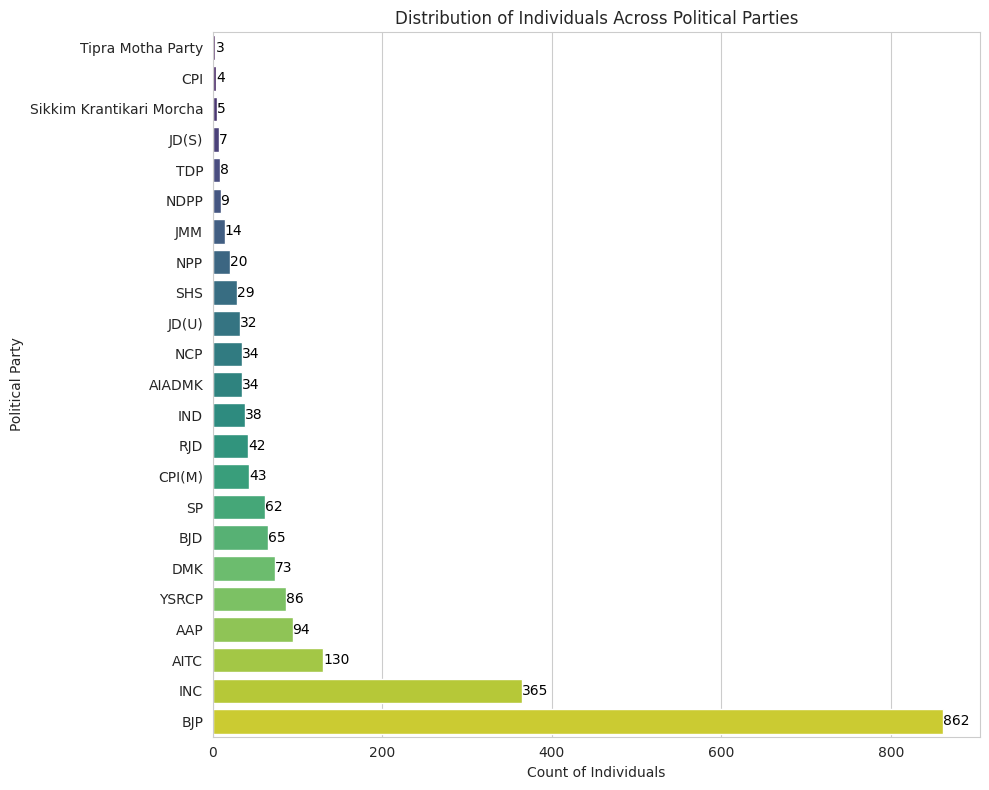

In [ ]:

party_summary = data.groupby('Party')['ID'].count().sort_values(ascending=True)

sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))
ax = sns.barplot(y=party_summary.index, x=party_summary.values, palette='viridis')

for bar in ax.patches:
    ax.text(x=bar.get_width(), y=bar.get_y() + bar.get_height() / 2,
            s=f'{int(bar.get_width())}',
            va='center', ha='left', color='black', fontsize=10)

# Setting labels for the axes.
plt.xlabel('Count of Individuals')
plt.ylabel('Political Party')

# Title for the plot.
plt.title('Distribution of Individuals Across Political Parties')

plt.tight_layout()

plt.show()



In [ ]:
# to train a model we do not need non numerical values so we can drop those columns which contain non numerical values for eg. candidate's name, Constituency, Party, State.


# dropped these two because we have the numerical values of these two
data.drop('Total Assets',axis=1,inplace=True)
data.drop('Liabilities',axis=1,inplace=True)


data.drop('Party',axis=1,inplace=True)
data.drop('Candidate',axis=1,inplace=True)
data.drop('Constituency ∇',axis=1,inplace=True)
data.drop('ID',axis=1,inplace=True)
# data.drop('state',axis=1,inplace=True)

test_data_temp=test_data.copy()
test_data.drop('ID',axis=1,inplace=True)
test_data.drop('Total Assets',axis=1,inplace=True)
test_data.drop('Liabilities',axis=1,inplace=True)
test_data.drop('Party',axis=1,inplace=True)
test_data.drop('Candidate',axis=1,inplace=True)
test_data.drop('Constituency ∇',axis=1,inplace=True)
# test_data.drop('state',axis=1,inplace=True)



In [ ]:

# There are 10 different classes and this is a text data so we need to convert it to a numerical representaion so that we can apply ML algorithms to it
# For this I have label encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
one_hot_encoder=OneHotEncoder()

# print(data['Education'].head(10))
data = pd.get_dummies(data,columns=['Education'])
# print(data['Education'].head(100).unique().count())
# data=pd.get_dummies(data,columns=['state'])
# test_data=pd.get_dummies(test_data,columns=['state'])
# data=pd.get_dummies(data,columns=['Party'])
# test_data=pd.get_dummies(test_data,columns=['Party'])








In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [ ]:

X = data.drop(['Education_10th Pass','Education_5th Pass','Education_8th Pass','Education_Doctorate','Education_Literate','Education_Graduate','Education_Post Graduate','Education_Graduate Professional','Education_Others','Education_12th Pass'],axis=1)


Y =data[['Education_10th Pass','Education_5th Pass','Education_8th Pass','Education_Doctorate','Education_Literate','Education_Graduate','Education_Post Graduate','Education_Graduate Professional','Education_Others','Education_12th Pass']]

y = np.argmax(Y.values, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=MinMaxScaler()
X_result=scaler.fit_transform(test_data)

knn = KNeighborsClassifier()


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', knn)
])


param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10, 15,20],
    'knn__weights': ['uniform', 'distance'],  # Weight types
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree'],  # Algorithm used to compute the nearest neighbors
    'knn__leaf_size': [10, 30, 50, 70],  # Leaf size passed to BallTree or KDTree
    'knn__p': [1, 2],  # Power parameter for the Minkowski metric
    'knn__metric': ['euclidean', 'manhattan']  # Metric for distance computation
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')


grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)
# # print(test_accuracy)
pred=best_model.predict(X_result)

db={
    'ID':test_data_temp['ID'],
    'Education':pred
}
subm = pd.DataFrame(db)

def update_education(education):
    if education == 0:
        return '10th Pass'
    elif education == 1:
        return '5th Pass'
    elif education ==2:
        return '8th Pass'
    elif education == 3:
        return 'Doctorate'
    elif education == 4:
        return 'Literate'
    elif education == 5:
        return 'Graduate'
    elif education == 6:
        return 'Post Graduate'
    elif education == 7:
        return 'Graduate Professional'
    elif education == 8:
        return 'Others'
    elif education == 9:
        return '12th Pass'



subm['Education'] = subm['Education'].apply(update_education)

submission_df = pd.DataFrame({'ID': test_data_temp['ID'], 'Education':pred})
subm.to_csv("submission.csv", index=False)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
0.18689320388349515
